In [1]:
#download a pretrained model 
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('bert-large-nli-stsb-mean-tokens')


#model = SentenceTransformer('bert-base-nli-mean-tokens')

In [2]:
import biobert_embedding

ImportError: dlopen(/Users/harrymingay/miniconda3/lib/python3.7/site-packages/torch/_C.cpython-37m-darwin.so, 9): Library not loaded: @rpath/libshm.dylib
  Referenced from: /Users/harrymingay/miniconda3/lib/python3.7/site-packages/torch/_C.cpython-37m-darwin.so
  Reason: image not found

In [2]:
import sklearn
from sklearn import cluster
import numpy as np
from copy import deepcopy
from sklearn.cluster import KMeans
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
#import the rules from rule_3_companion.txt 
with open('rule_3_companion.txt', 'r') as f:
    r3 = f.read()

#seperate out the rules in the .txt file into seperate sentences     
sents = [a.strip() for a in r3.split('\n- ')]
sents = sents[1:]


In [4]:
#map the rules to vectors using the pretrained model 
sentence_embeddings = model.encode(sents)


In [5]:
import numpy as np

#create an array with the 13 rules and their corresponding sentence_embeddings 
array = np.array(sentence_embeddings) 

array.shape
#print(array)

(13, 1024)

In [305]:
kmeansAlgo = sklearn.cluster.KMeans(n_clusters=9) # initalise KMeans

kmeansAlgo.fit(array) # fitting the KMeans algorithm

# Predicting labels with KMeans clustering
labels = kmeansAlgo.predict(array); labels

array([4, 6, 2, 1, 2, 8, 2, 5, 3, 2, 0, 7, 7], dtype=int32)

In [306]:
#defining the cluster centres for the KMeans algorithm 

centers = kmeansAlgo.cluster_centers_
centers.shape

(9, 1024)

In [307]:
with open('rule_3.txt', 'r') as f:
    r3 = f.read()
    
sents = [a.strip() for a in r3.split('\n- ')]
sents = sents[1:]

In [308]:
#sents = ['Rule 3a', 'Rule 3b','Rule 3c','Rule 3d','Rule 3e','Rule 3f','Rule 3g','Rule 3h','Rule 3i','Rule 3j','Rule 3k','Rule 3l','Rule 3m', ]

In [309]:
pd.DataFrame({'sentences': sents, 'cluster number': (labels)})

,sentences,cluster number
0,"for detecting the presence of, or exposure to,...",4
1,for detecting the presence in cerebrospin...,6
2,for detecting the presence of an infecti...,2
3,for pre-natal screening of women in order to ...,1
4,for determining infective disease status ...,2
5,to be used as companion diagnostics;,8
6,"to be used for disease staging, where t...",2
7,"to be used in screening, diagnosis, or staging...",5
8,for human genetic testing;,3
9,for monitoring of levels of medicinal pr...,2


In [310]:
kmeansAlgo.cluster_centers_.shape


(9, 1024)

In [311]:
# performing a principal component analysis to reduce the number of dimensions 

pca = sklearn.decomposition.PCA()
result = pca.fit_transform(array)

In [312]:
projected_centers = pca.transform(centers)
projected_centers[:, :2].shape

(9, 2)

In [313]:
# label names and colours for the plot 
cdict = {0: 'green', 1: 'red', 2: 'orange', 3: 'blue', 4: 'purple', 5: 'turquoise', 6: 'brown', 7: 'yellow', 8: 'maroon'}
label_names = {0: 'cluster 1', 1: 'cluster 2', 2: 'cluster 3', 3: 'cluster 4', 4: 'cluster 5', 5: 'cluster 6', 6: 'cluster 7', 7: 'cluster 8', 8: 'cluster 9'}

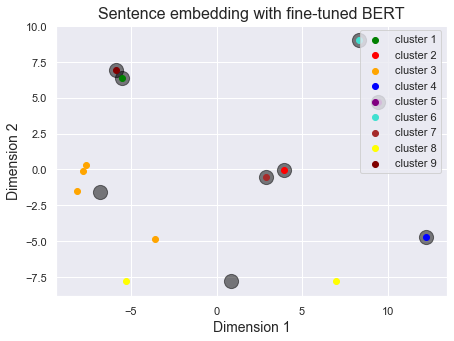

In [314]:
#plot the clusters along with the cluster centres 

fig,ax = plt.subplots(figsize = (7,5))
plt.scatter(projected_centers[:, 0], projected_centers[:, 1], c='black', s=200, alpha=0.5)

for l in np.unique(labels):
    idx = np.where(labels==l)
    ax.scatter(result[idx, 0], result[idx, 1],
              c=cdict[l], label=label_names[l])

plt.title("Sentence embedding with fine-tuned BERT", fontsize=16)
plt.xlabel("Dimension 1",fontsize=14)
plt.ylabel("Dimension 2",fontsize=14)
plt.legend()
plt.show()
fig.savefig('BERT STS cluster')

#pca; first component is a weighted linear combination of the 96 dimensions 
#second is also weighted....
#when you project vectors onto this 2D space, you lose information which is why we have an unexpected cluster centre 

#the clusters have been calcualted in 96 dimensions so when you do the pca you don't preserve 

In [315]:
clust = pca.transform(centers)[:,:2]
centers.shape
print(clust)

[[-5.5017247   6.4014025 ]
 [ 3.9575915  -0.07233022]
 [-6.8009014  -1.5508552 ]
 [12.261898   -4.7157664 ]
 [ 9.47145     4.7185493 ]
 [ 8.311987    9.040749  ]
 [ 2.904497   -0.5434267 ]
 [ 0.8404759  -7.7741957 ]
 [-5.883047    6.922639  ]]


In [316]:
points = pca.transform(array)[:,:2]
print(points)
points.shape

[[ 9.47145     4.7185493 ]
 [ 2.904497   -0.5434267 ]
 [-3.6028218  -4.8394194 ]
 [ 3.9575915  -0.07233022]
 [-8.168665   -1.5328674 ]
 [-5.883047    6.922639  ]
 [-7.7967577  -0.11713095]
 [ 8.311987    9.040749  ]
 [12.261898   -4.7157664 ]
 [-7.635359    0.28599787]
 [-5.5017247   6.4014025 ]
 [ 6.9976087  -7.7598276 ]
 [-5.3166585  -7.7885675 ]]


(13, 2)